In [70]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **1.Reading the Data**
##### Using a dataset with data extracted from [Fragrantica](https://www.fragrantica.com)

*Data until 2024* | **Source of the data**: Kaggle platform  


In [71]:
#Reading data from a .csv file in the same directory
fragrance_df = pd.read_csv("../data/fragrance_database.csv", sep=";", encoding="latin1")


In [72]:
fragrance_df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,"1,92",59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,NaN
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,"1,93",632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,vanilla


In [73]:
#Shape and format of the dataframe obtain from webscrapping
print(fragrance_df.shape)
print("Number of rows:", fragrance_df.shape[0]) # Number of rows
print("Number of columns:", fragrance_df.shape[1]) # Number of columns

(24063, 18)
Number of rows: 24063
Number of columns: 18


In [74]:
# Count the unique values in each column
nunique_values = fragrance_df.nunique()
print(nunique_values)

url             24063
Perfume         22840
Brand            1060
Country            54
Gender              3
Rating Value      221
Rating Count     2721
Year              145
Top             18771
Middle          19690
Base            16393
Perfumer1         869
Perfumer2         259
mainaccord1        66
mainaccord2        71
mainaccord3        72
mainaccord4        69
mainaccord5        77
dtype: int64


### **2. Cleaning data**
#### Checking handling null values and duplicates

In [75]:
# Count the number of duplicate rows
number_of_duplicates = fragrance_df.duplicated().sum()
print(f"Number of duplicated rows: {number_of_duplicates}")

Number of duplicated rows: 0


In [76]:
# Count the number of null values in each column before handling
print("Number of null values in each column before handling:")
print(fragrance_df.isna().sum())

Number of null values in each column before handling:
url                 0
Perfume             0
Brand               0
Country             0
Gender              0
Rating Value        0
Rating Count        0
Year             2037
Top                 0
Middle              0
Base                0
Perfumer1           0
Perfumer2       22727
mainaccord1         0
mainaccord2        13
mainaccord3       114
mainaccord4       388
mainaccord5       981
dtype: int64


In [77]:
#Check if there are some duplicated rows in the dataframe
duplicates = fragrance_df.groupby(["Brand", "Perfume", "Gender", "Year"]).filter(lambda x: len(x) > 1)

#Organise to visualize
duplicates = duplicates.sort_values(by=["Brand", "Perfume"])

#Visualize
duplicates

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
3868,https://www.fragrantica.com/perfume/bugatti-fa...,bugatti-dynamic-move-amber,bugatti-fashion,Germany,men,"3,7",46,2023.0,"aromatic notes, lemon, nutmeg","aquatic notes, lavender, aldehydes","amber, musk, patchouli, licorice",unknown,NaN,amber,musky,aromatic,aldehydic,lavender
19315,https://www.fragrantica.com/perfume/bugatti-fa...,bugatti-dynamic-move-amber,bugatti-fashion,Germany,men,"4,19",101,2023.0,"cinnamon, aromatic notes","violet, cypriol oil or nagarmotha","cedar, tobacco",unknown,NaN,woody,cinnamon,warm spicy,tobacco,powdery
15027,https://www.fragrantica.com/perfume/caron/fleu...,fleurs-de-rocaille,caron,France,women,"4,05",522,1934.0,"aldehydes, tincture of rose, lilac, jasmine","carnation, ylang-ylang, lily-of-the-valley, vi...","oak moss, sandalwood, musk, virginia cedar",ernest daltroff,NaN,floral,fresh,woody,white floral,aldehydic
21981,https://www.fragrantica.com/perfume/caron/fleu...,fleurs-de-rocaille,caron,France,women,"4,32",158,1934.0,"lilac, aldehydes, rose, jasmine","ylang-ylang, lily-of-the-valley, violet, cloves","musk, oakmoss, sandalwood, virginian cedar",ernest daltroff,NaN,floral,fresh,white floral,woody,powdery
810,https://www.fragrantica.com/perfume/commodity/...,book,commodity,USA,unisex,"3,44",185,2021.0,"sandalwood, cedar","black tea, musk",musk,unknown,NaN,woody,powdery,warm spicy,NaN,NaN
1180,https://www.fragrantica.com/perfume/commodity/...,book,commodity,USA,unisex,"3,5",254,2021.0,"sandalwood, cedar","black tea, musk",musk,unknown,NaN,woody,powdery,musky,green,warm spicy
1580,https://www.fragrantica.com/perfume/commodity/...,gold,commodity,USA,unisex,"3,55",347,2021.0,"amber, vanilla, sandalwood","vanilla, iso e super","saffron, patchouli, nutmeg",unknown,NaN,woody,warm spicy,amber,vanilla,powdery
10841,https://www.fragrantica.com/perfume/commodity/...,gold,commodity,USA,unisex,"3,94",196,2021.0,"vanilla, sandalwood, amber","vanilla, iso e super","nutmeg, saffron, patchouli",unknown,NaN,woody,amber,vanilla,powdery,musky
282,https://www.fragrantica.com/perfume/commodity/...,juice,commodity,USA,unisex,"3,26",27,2024.0,"violet leaf, raspberry, strawberry","bulgarian rose, cyclamen","rhubarb, amberwood",nathalie benareau,NaN,fruity,sweet,green,ozonic,aquatic
1401,https://www.fragrantica.com/perfume/commodity/...,juice,commodity,USA,unisex,"3,53",36,2024.0,"raspberry, strawberry","rhubarb, bulgarian rose, cyclamen","patchouli, amberwood, vetiver",nathalie benareau,NaN,fruity,sweet,woody,rose,green


In [78]:
#Check manually the duplicated rows
print(duplicates["url"].tolist())

['https://www.fragrantica.com/perfume/bugatti-fashion/bugatti-dynamic-move-amber-81845.html', 'https://www.fragrantica.com/perfume/bugatti-fashion/bugatti-dynamic-move-amber-81843.html', 'https://www.fragrantica.com/perfume/caron/fleurs-de-rocaille-2919.html', 'https://www.fragrantica.com/perfume/caron/fleurs-de-rocaille-34542.html', 'https://www.fragrantica.com/perfume/commodity/book-70014.html', 'https://www.fragrantica.com/perfume/commodity/book-70022.html', 'https://www.fragrantica.com/perfume/commodity/gold-70015.html', 'https://www.fragrantica.com/perfume/commodity/gold-70024.html', 'https://www.fragrantica.com/perfume/commodity/juice-94565.html', 'https://www.fragrantica.com/perfume/commodity/juice-94562.html', 'https://www.fragrantica.com/perfume/commodity/juice-94564.html', 'https://www.fragrantica.com/perfume/commodity/milk-70021.html', 'https://www.fragrantica.com/perfume/commodity/milk-69191.html', 'https://www.fragrantica.com/perfume/commodity/milk-70012.html', 'https://ww

Regarding this new dataset "duplicates" will be remove for the machine learning exercies, but seems to be different launches in terms of packaging, variants, etc...But the difference is meaningless

### **3. Transforming data**
#### Creating a column for olfactive families base on main accord 1 column
#### Converting columns ['Year'] and ['Rating Value'] to int and float respectively

In [79]:
# Get unique values from a specific column (Now: mainaccord1)
unique_values_ma1 = fragrance_df['mainaccord1'].unique()
print(unique_values_ma1)

['rose' 'citrus' 'fruity' 'aromatic' 'white floral' 'woody' 'powdery'
 'leather' 'green' 'rubber' 'floral' 'ozonic' 'vinyl' 'musky'
 'yellow floral' 'earthy' 'warm spicy' 'fresh spicy' 'fresh' 'sweet'
 'amber' 'vanilla' 'tropical' 'lavender' 'almond' 'violet' 'iris' 'cherry'
 'aquatic' 'aldehydic' 'animalic' 'oud' 'marine' 'metallic' 'lactonic'
 'coffee' 'tuberose' 'caramel' 'smoky' 'coconut' 'soft spicy' 'patchouli'
 'sand' 'anis' 'mossy' 'honey' 'mineral' 'chocolate' 'cacao' 'coca-cola'
 'tobacco' 'savory' 'plastic' 'herbal' 'nutty' 'soapy' 'balsamic' 'salty'
 'asphault' 'champagne' 'beeswax' 'cinnamon' 'whiskey' 'rum'
 'industrial glue' 'oriental']


In [80]:
# Function to assign a fragrance family
def assign_family(accord):   
    if accord in ['citrus']:
        return 'Citrus'
    elif accord in ['rose','floral', 'yellow floral']:
        return 'Floral'
    elif accord in ['white floral','tuberose']:
        return 'White Floral'
    elif accord in ['fruity', 'cherry','coconut', 'tropical','lactonic']:
        return 'Fruity'
    elif accord in ['aromatic','lavender']:
        return 'Aromatic'
    elif accord in ['woody', 'oud', 'patchouli' 'sandalwood']:
        return 'Woody'
    elif accord in ['warm spicy', 'fresh spicy', 'soft spicy', 'anis', 'cinnamon']:
        return 'Spicy'
    elif accord in ['sweet','coffee', 'caramel','cacao', 'honey', 'chocolate']:
        return 'Gourmand'
    elif accord in ['vanilla', 'almond' , 'nutty', 'balsamic']:
        return 'Balsamic'
    elif accord in ['amber']:
        return 'Ambery'
    elif accord in ['tobacco','whiskey','rum','oriental']:
        return 'Oriental'
    elif accord in ['powdery', 'iris']:
        return 'Powdery'
    elif accord in ['leather', 'tobacco']: 
        return 'Leathery'
    elif accord in ['green','herbal', 'violet']:
        return 'Green'
    elif accord in ['musky']:
        return 'Musky'
    elif accord in ['earthy']:
        return 'Earthy'
    elif accord in ['aquatic']:
        return 'Aquatic'
    elif accord in ['aldehydic', 'ozonic', 'fresh']:
        return 'Aldehydic'
    elif accord in ['marine']:
        return 'Marine'
    else:
        return 'Others'

# Apply the function to create a new column 'family'
fragrance_df['family'] = fragrance_df['mainaccord1'].apply(assign_family)

In [81]:
# Get unique values from a specific column (Now: our NEW column 'family')
unique_values_ma1 = fragrance_df['family'].unique()
print(unique_values_ma1)

['Floral' 'Citrus' 'Fruity' 'Aromatic' 'White Floral' 'Woody' 'Powdery'
 'Leathery' 'Green' 'Others' 'Aldehydic' 'Musky' 'Earthy' 'Spicy'
 'Gourmand' 'Ambery' 'Balsamic' 'Aquatic' 'Marine' 'Oriental']


In [82]:
# Convert 'Rating Value' to float
fragrance_df['Rating Value'] = fragrance_df['Rating Value'].str.replace(',', '.', regex=False)
fragrance_df['Rating Value'] = pd.to_numeric(fragrance_df['Rating Value'], errors='coerce')

# Convert 'Year' to int
fragrance_df['Year'] = fragrance_df['Year'].astype('Int64') 

# Check the changes
fragrance_df.dtypes

url              object
Perfume          object
Brand            object
Country          object
Gender           object
Rating Value    float64
Rating Count      int64
Year              Int64
Top              object
Middle           object
Base             object
Perfumer1        object
Perfumer2        object
mainaccord1      object
mainaccord2      object
mainaccord3      object
mainaccord4      object
mainaccord5      object
family           object
dtype: object

In [83]:
# Ver los valores únicos de 'Rating Value' y cuántas veces aparece cada uno
rating_counts = fragrance_df['Rating Count'].value_counts()

# Mostrar los valores únicos y su frecuencia
print(rating_counts)

Rating Count
27       283
26       283
28       272
30       252
29       252
        ... 
1618       1
3304       1
1730       1
3524       1
13406      1
Name: count, Length: 2721, dtype: int64


### **4. EDA**
#### Top 10 fragrances with best & most rating

<Axes: xlabel='Rating Value', ylabel='Count'>

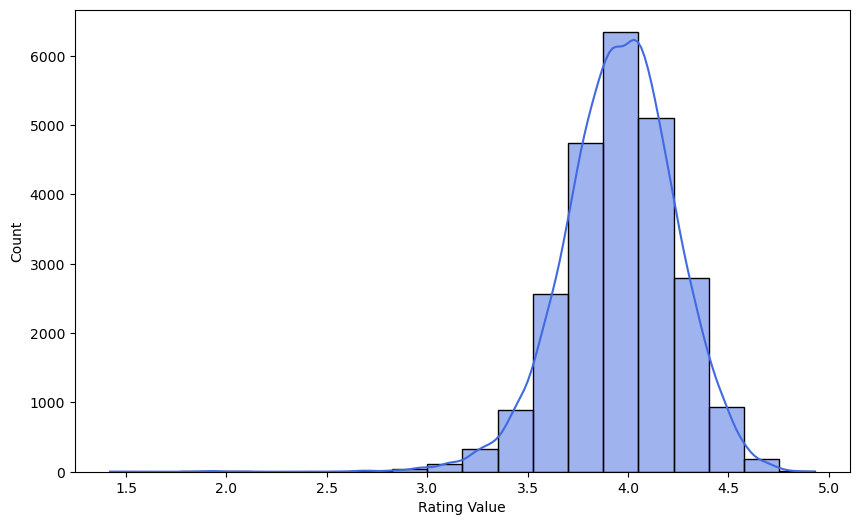

In [84]:
# Create the histogram of the 'Rating Value' column
plt.figure(figsize=(10, 6))
sns.histplot(fragrance_df['Rating Value'], bins=20, kde=True, color='royalblue')

<Axes: xlabel='Rating Count', ylabel='Count'>

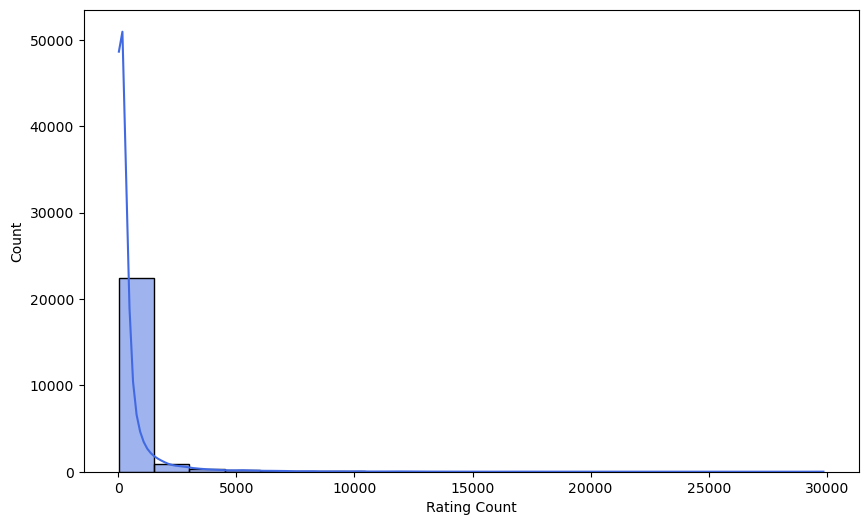

In [85]:
# Create the histogram of the 'Rating Count' column
plt.figure(figsize=(10, 6))
sns.histplot(fragrance_df['Rating Count'], bins=20, kde=True, color='royalblue')

In [86]:
# Sort by 'Rating Value' (highest first) and then by 'Rating Count' (highest first)
top_10_ratings = fragrance_df.sort_values(by=['Rating Count','Rating Value'], ascending=[False,False])

# Display the top 10 rows
top_10_ratings.head(10)

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,family
12914,https://www.fragrantica.com/perfume/mugler/ali...,alien,mugler,France,women,4.00,29858,2005,jasmine sambac,cashmeran,amber,dominique ropion,laurent bruyere,white floral,amber,floral,NaN,NaN,White Floral
1812,https://www.fragrantica.com/perfume/mugler/ang...,angel,mugler,France,women,3.57,29722,1992,"cotton candy, coconut, cassis, melon, jasmine,...","honey, red berries, blackberry, plum, apricot,...","patchouli, chocolate, caramel, vanilla, tonka ...",olivier cresp,yves de chirin,sweet,patchouli,fruity,warm spicy,caramel,Gourmand
7457,https://www.fragrantica.com/perfume/dolce-gabb...,light-blue,dolce-gabbana,Italy,women,3.84,29708,2001,"sicilian lemon, apple, cedar, bellflower","bamboo, jasmine, white rose","cedar, musk, amber",olivier cresp,NaN,citrus,woody,fresh,fruity,aromatic,Citrus
17145,https://www.fragrantica.com/perfume/chanel/coc...,coco-mademoiselle,chanel,France,women,4.12,29283,2001,"orange, mandarin orange, bergamot, orange blossom","turkish rose, jasmine, mimosa, ylang-ylang","patchouli, white musk, vanilla, vetiver, tonka...",jacques polge,NaN,citrus,woody,patchouli,sweet,white floral,Citrus
2746,https://www.fragrantica.com/perfume/lancome/la...,la-vie-est-belle,lancome,France,women,3.64,28982,2012,"black currant, pear","iris, jasmine, orange blossom","praline, vanilla, patchouli, tonka bean",unknown,NaN,sweet,vanilla,fruity,patchouli,woody,Gourmand
9859,https://www.fragrantica.com/perfume/tom-ford/b...,black-orchid,tom-ford,USA,women,3.91,26053,2006,"truffle, gardenia, black currant, ylang-ylang,...","orchid, spices, gardenia, fruity notes, ylang-...","mexican chocolate, patchouli, vanille, incense...",david apel,pierre negrin,warm spicy,earthy,woody,sweet,amber,Spicy
10579,https://www.fragrantica.com/perfume/yves-saint...,black-opium,yves-saint-laurent,France,women,3.93,25669,2014,"pear, pink pepper, orange blossom","coffee, jasmine, bitter almond, licorice","vanilla, patchouli, cashmere wood, cedar",unknown,NaN,vanilla,coffee,sweet,warm spicy,white floral,Balsamic
16127,https://www.fragrantica.com/perfume/dior/hypno...,hypnotic-poison,dior,France,women,4.09,25173,1998,"coconut, plum, apricot","brazilian rosewood, jasmine, caraway, tuberose...","vanilla, almond, sandalwood, musk",annick menardo,christian dussoulier,vanilla,sweet,almond,fruity,nutty,Balsamic
5691,https://www.fragrantica.com/perfume/dior/j-ado...,j-adore,dior,France,women,3.78,25013,1999,"pear, melon, magnolia, peach, mandarin orange,...","jasmine, lily-of-the-valley, tuberose, freesia...","musk, vanilla, blackberry, cedar",calice becker,NaN,white floral,floral,fruity,sweet,fresh,White Floral
8729,https://www.fragrantica.com/perfume/dior/sauva...,sauvage,dior,France,men,3.88,23727,2015,"calabrian bergamot, pepper","sichuan pepper, lavender, pink pepper, vetiver...","ambroxan, cedar, labdanum",françois demachy,NaN,fresh spicy,amber,citrus,aromatic,musky,Spicy


In [87]:
# Sort by 'Rating Value' (highest first) and then by 'Rating Count' (highest first)
top_10_ratings = fragrance_df.sort_values(by=['Rating Value','Rating Count'], ascending=[False,False])

# Display the top 10 rows
top_10_ratings.head(10)

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,family
24062,https://www.fragrantica.com/perfume/nilafar-du...,narmar-extrait-de-parfum,nilafar-du-nil,Egypt,men,4.93,30,2022,"cardamom, lavender, juniper, bergamot, clary sage","cashmeran, rose, green tea, lily, cinnamon","cashmeran, tobacco, oakmoss, suede, tonka bean...",unknown,NaN,aromatic,woody,warm spicy,musky,fresh spicy,Aromatic
24061,https://www.fragrantica.com/perfume/parfumerie...,aoud-no-1,parfumerie-bruckner,Germany,unisex,4.86,28,2011,"apple, peach, saffron","plum, orange blossom, jasmine","agarwood (oud), sandalwood, vanilla",unknown,NaN,fruity,sweet,oud,woody,powdery,Fruity
24060,https://www.fragrantica.com/perfume/darkbeat-p...,khaox,darkbeat-parfums,Spain,unisex,4.85,26,2020,"mint, lime, rum","lily-of-the-valley, fig leaf, cardamom","musk, oakmoss, amber, patchouli",josé m. giraldo,NaN,green,aromatic,citrus,fresh spicy,woody,Green
24058,https://www.fragrantica.com/perfume/o-boticari...,floratta,o-boticario,Brazil,women,4.81,31,1992,"ozonic notes, peach","lily-of-the-valley, jasmine","musk, amber",thierry lecoule,NaN,white floral,ozonic,fresh,musky,powdery,White Floral
24059,https://www.fragrantica.com/perfume/sultan-pas...,cheval-d-arabie,sultan-pasha-attars,UK,unisex,4.81,26,2020,"taif rose, indian oud, white rose, olibanum, e...","bulgarian rose, indian oud, hay, leather, cive...","white amber, leather, hay, elemi resin, kyara ...",sultan pasha,NaN,rose,amber,fresh spicy,animalic,aromatic,Floral
24057,https://www.fragrantica.com/perfume/yves-saint...,art-collection-la-nuit-de-l-homme,yves-saint-laurent,France,men,4.79,29,2014,cardamom,"lavender, cedar, bergamot","vetiver, caraway",unknown,NaN,aromatic,woody,warm spicy,lavender,fresh spicy,Aromatic
24055,https://www.fragrantica.com/perfume/karen-low/...,xchange-wonderman,karen-low,France,men,4.77,39,2018,"pear, lavender, mint, bergamot, lemon","cinammon, sage, coriander","black vanilla husk, patchouli, ambergris, whit...",unknown,NaN,vanilla,fruity,sweet,warm spicy,cinnamon,Balsamic
24056,https://www.fragrantica.com/perfume/michael-ma...,citizen-jack-parfum,michael-malul-london,USA,men,4.77,30,2022,"melon, bergamot, water lily, mandarin leaf","vanilla, amberwood, clary sage, violet leaf","sandalwood, tonka bean, vetiver, musk",clement gavarry,NaN,woody,vanilla,powdery,aromatic,amber,Woody
24054,https://www.fragrantica.com/perfume/o-boticari...,clipping,o-boticario,Brazil,unisex,4.77,26,2002,"ginger, lemon, mint","nutmeg, black pepper","woodsy notes, tobacco, musk",unknown,NaN,fresh spicy,warm spicy,citrus,aromatic,woody,Spicy
24051,https://www.fragrantica.com/perfume/afnan/zima...,zimaya-wujood,afnan,UAE,men,4.76,49,<NA>,"vanilla, black pepper, elemi","olibanum, saffron, musk","vanilla, amber",unknown,NaN,vanilla,fresh spicy,amber,warm spicy,powdery,Balsamic


C:\Users\celia\AppData\Local\Temp\ipykernel_16008\425233382.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Brand', data=top_brands, palette='Blues_r')


<Axes: xlabel='Count', ylabel='Brand'>

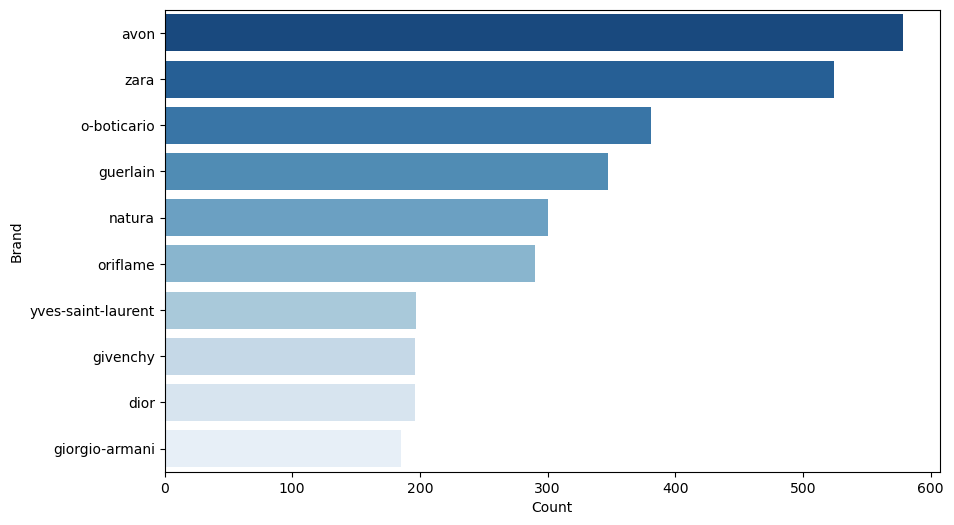

In [90]:
#Count the number of products by brand
brand_counts = fragrance_df.groupby('Brand').size().reset_index(name='Count')

# Order and choose the top 10 brands
top_brands = brand_counts.sort_values(by='Count', ascending=False).head(10)

# Visualize the top 10 brands in graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Brand', data=top_brands, palette='Blues_r')

C:\Users\celia\AppData\Local\Temp\ipykernel_16008\2446816771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Count', data=brand_counts, palette='Blues_r')


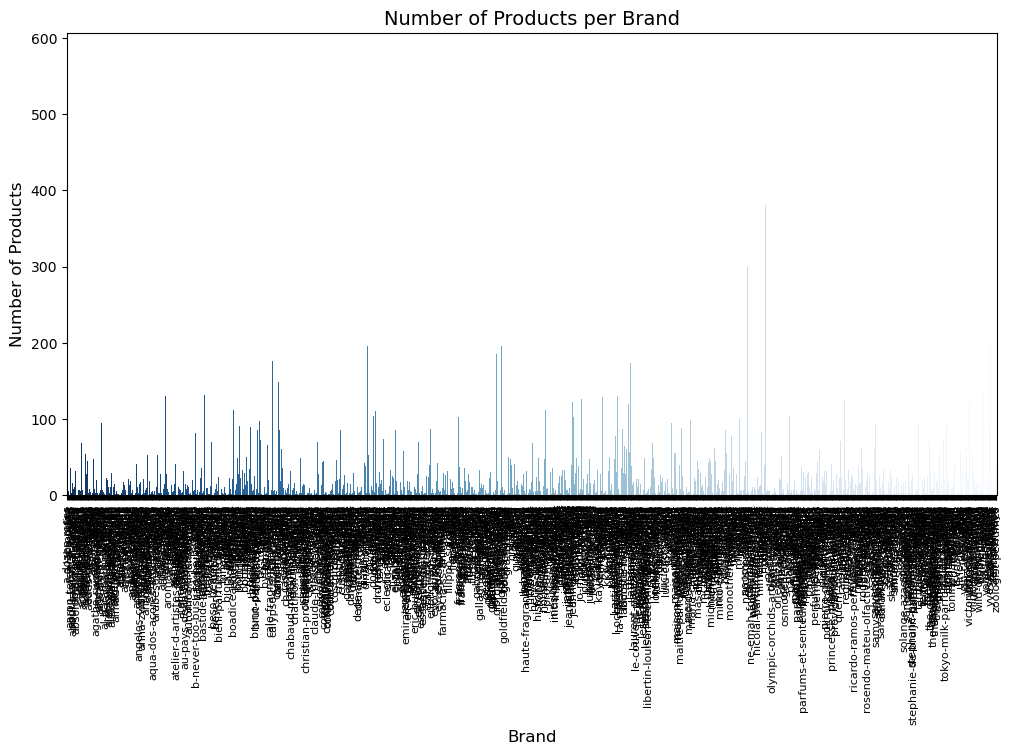

In [93]:
# Create graphics by the number of products per brand
plt.figure(figsize=(12, 6))
sns.barplot(x='Brand', y='Count', data=brand_counts, palette='Blues_r')

# Rotar etiquetas del eje X para que se vean bien
plt.xticks(rotation=90, fontsize=8)

# Agregar títulos y etiquetas
plt.title('Number of Products per Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)

# Mostrar el gráfico
plt.show()


In [88]:
# Save in UTF-8
fragrance_df.to_csv("../data/fragrance_database_guardado_utf8.csv", sep=";", encoding="utf-8", index=False)

# Read the saved file
fragrance_df = pd.read_csv("../data/fragrance_database_guardado_utf8.csv", sep=";", encoding="utf-8")

In [89]:
fragrance_df

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5,family
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,1.42,201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral,Floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,1.86,70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky,Citrus
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,1.91,285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky,Citrus
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,1.92,59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,NaN,Fruity
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,1.93,632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,vanilla,Aromatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24058,https://www.fragrantica.com/perfume/o-boticari...,floratta,o-boticario,Brazil,women,4.81,31,1992.0,"ozonic notes, peach","lily-of-the-valley, jasmine","musk, amber",thierry lecoule,NaN,white floral,ozonic,fresh,musky,powdery,White Floral
24059,https://www.fragrantica.com/perfume/sultan-pas...,cheval-d-arabie,sultan-pasha-attars,UK,unisex,4.81,26,2020.0,"taif rose, indian oud, white rose, olibanum, e...","bulgarian rose, indian oud, hay, leather, cive...","white amber, leather, hay, elemi resin, kyara ...",sultan pasha,NaN,rose,amber,fresh spicy,animalic,aromatic,Floral
24060,https://www.fragrantica.com/perfume/darkbeat-p...,khaox,darkbeat-parfums,Spain,unisex,4.85,26,2020.0,"mint, lime, rum","lily-of-the-valley, fig leaf, cardamom","musk, oakmoss, amber, patchouli",josé m. giraldo,NaN,green,aromatic,citrus,fresh spicy,woody,Green
24061,https://www.fragrantica.com/perfume/parfumerie...,aoud-no-1,parfumerie-bruckner,Germany,unisex,4.86,28,2011.0,"apple, peach, saffron","plum, orange blossom, jasmine","agarwood (oud), sandalwood, vanilla",unknown,NaN,fruity,sweet,oud,woody,powdery,Fruity
